In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_hotel = pd.read_csv("fix2.csv")
df_hotel.head()

,Komentar,Label
0,Murah meriah nyaman tenang aman dan staff ramah,1.0
1,Tenang nyaman staff ramah kamar luas pemandang...,1.0
2,Sangat nyaman suasana alam. seperti tinggal di...,1.0
3,hotelnya masuk di perumahan tapi keren...manta...,1.0
4,Dengan harga 350 ribu include tax. Dapat kamar...,1.0


In [3]:
df_hotel['Label'].value_counts()

0.0    231
1.0    231
Name: Label, dtype: int64

In [4]:
df_hotel.isnull().sum()

Komentar    0
Label       7
dtype: int64

In [5]:
df_hotel.dropna(inplace=True)

In [6]:
df_hotel.isnull().sum()

Komentar    0
Label       0
dtype: int64

In [7]:
df_pre = df_hotel.copy()
df_pre.head()

,Komentar,Label
0,Murah meriah nyaman tenang aman dan staff ramah,1.0
1,Tenang nyaman staff ramah kamar luas pemandang...,1.0
2,Sangat nyaman suasana alam. seperti tinggal di...,1.0
3,hotelnya masuk di perumahan tapi keren...manta...,1.0
4,Dengan harga 350 ribu include tax. Dapat kamar...,1.0


In [8]:
df_hotel['Label'].value_counts()

0.0    231
1.0    231
Name: Label, dtype: int64

In [9]:
#wf=wordcloud.words_

In [10]:
import string, re

def cleaning(data):
    # lower text
    data = data.lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

In [11]:
# jalankan cleaning data
review = []
for index, row in df_pre.iterrows():
    review.append(cleaning(row["Komentar"]))
    
df_pre["Komentar"] = review
df_pre.head(10)

,Komentar,Label
0,murah meriah nyaman tenang aman dan staff ramah,1.0
1,tenang nyaman staff ramah kamar luas pemandang...,1.0
2,sangat nyaman suasana alam seperti tinggal di...,1.0
3,hotelnya masuk di perumahan tapi keren manta...,1.0
4,dengan harga 350 ribu include tax dapat kamar...,1.0
5,hotel dibukit dikelilingi pohonan rimbun yang ...,1.0
6,pas kesana kebetulan cuaca lagi mendung manja ...,1.0
7,anda harus mencoba menginap di hotel yang supe...,1.0
8,hotel di tengah kota dengan suasana hijau ala ...,1.0
9,pelayanan sangat ramah kamar besar dan luas ...,1.0


In [12]:
# import library
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
 
# Contoh
kalimat = 'Dengan Menggunakan Python dan Library Sastrawi saya dapat melakukan proses Stopword Removal'
stop = stopword.remove(kalimat)
print(stop)

Dengan Menggunakan Python Library Sastrawi dapat melakukan proses Stopword Removal


In [13]:
# lakukan pada data kita

review = []
for index, row in df_pre.iterrows():
    review.append(stopword.remove(row["Komentar"]))
    
df_pre["Komentar"] = review
df_pre.head(10)

,Komentar,Label
0,murah meriah nyaman tenang aman staff ramah,1.0
1,tenang nyaman staff ramah kamar luas pemandang...,1.0
2,sangat nyaman suasana alam tinggal tengah hutan,1.0
3,hotelnya masuk perumahan keren mantapsss,1.0
4,harga 350 ribu include tax kamar nyaman mewah...,1.0
5,hotel dibukit dikelilingi pohonan rimbun hijau...,1.0
6,pas kesana kebetulan cuaca mendung manja sara...,1.0
7,harus mencoba menginap hotel super nyaman,1.0
8,hotel tengah kota suasana hijau ala hutan san...,1.0
9,pelayanan sangat ramah kamar besar luas view...,1.0


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'Liverpool adalah klub terhebat tidak seperti si itu WkwkWK'
katadasar = stemmer.stem(kalimat)
 
print(katadasar)

liverpool adalah klub hebat tidak seperti si itu wkwkwk


In [15]:
# implementasi pada data kita
review = []
for index, row in df_pre.iterrows():
    review.append(stemmer.stem(row["Komentar"]))
    
df_pre["Komentar"] = review
df_pre.head(464)

,Komentar,Label
0,murah riah nyaman tenang aman staff ramah,1.0
1,tenang nyaman staff ramah kamar luas pandang b...,1.0
2,sangat nyaman suasana alam tinggal tengah hutan,1.0
3,hotel masuk rumah keren mantapsss,1.0
4,harga 350 ribu include tax kamar nyaman mewah ...,1.0
...,...,...
464,receptionis kurang ramah handuk hotel kotor ma...,0.0
465,kolam renang jorok mungkin inap saat libur pan...,0.0
466,masuk kamar hotel ontime jam 12 kamar bau mie ...,0.0
467,hotel kotor kasur sprei nya sobek kotor,0.0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pre['Komentar'], df_pre['Label'], 
                                                    test_size=0.15, stratify=df_pre['Label'], random_state=30)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi']

vectorizer = TfidfVectorizer()

# contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.49248889, 0.        , 0.40264194, 0.77157901,
        0.        ],
       [0.77157901, 0.49248889, 0.        , 0.40264194, 0.        ,
        0.        ],
       [0.        , 0.49248889, 0.        , 0.40264194, 0.        ,
        0.77157901],
       [0.        , 0.        , 0.88654763, 0.46263733, 0.        ,
        0.        ]])

In [18]:
# implementasi pada dokumen kita
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(392, 1161)
(70, 1161)


In [19]:
def preprocess_data(data):
    # cleaning data
    data = cleaning(data)
    
    # hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    # count vectorizer
    data = vectorizer.transform([data])
    
    return data

In [20]:
df_pre.head(10)

,Komentar,Label
0,murah riah nyaman tenang aman staff ramah,1.0
1,tenang nyaman staff ramah kamar luas pandang b...,1.0
2,sangat nyaman suasana alam tinggal tengah hutan,1.0
3,hotel masuk rumah keren mantapsss,1.0
4,harga 350 ribu include tax kamar nyaman mewah ...,1.0
5,hotel bukit keliling pohon rimbun hijau banget...,1.0
6,pas kesana betul cuaca mendung manja sarap len...,1.0
7,harus coba inap hotel super nyaman,1.0
8,hotel tengah kota suasana hijau ala hutan sang...,1.0
9,layan sangat ramah kamar besar luas view balko...,1.0


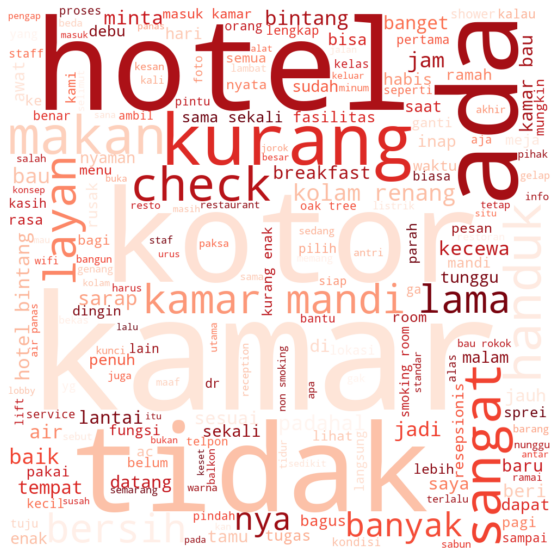

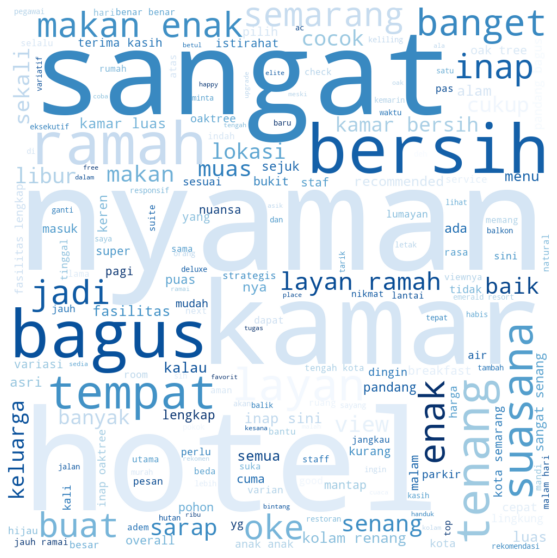

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Polarity == 0 negative
train_s0 = df_pre[df_pre["Label"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["Komentar"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Polarity == 1 positive
train_s1 = df_pre[df_pre["Label"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["Komentar"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [22]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel="linear")

#cross_val_score(clf, X_train, y_train, cv=10)

In [23]:
# lakukan prediksi pada data test
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

In [24]:
# import library evaluation
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [25]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test, predict))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, predict))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, predict))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, predict))

f1 score hasil prediksi adalah: 
0.8985507246376812
accuracy score hasil prediksi adalah: 
0.9
precision score hasil prediksi adalah: 
0.9117647058823529
recall score hasil prediksi adalah: 
0.8857142857142857


In [26]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
tn, fp, fn, tp

(32, 3, 4, 31)

In [27]:
review_positif = "Saya suka bermalam disini. kamarnya sesuai dengan apa yang saya pesan. pelayannya ramah. menu breakfastnya enak dan lezat. terutama koki omelettenya bisa menghargai orang pribumi. tak bosan menginap disini. kapan-kapan menginap di oaktree lagi"
review_negatif = "bangunan kotor"

In [28]:
clf.predict(preprocess_data(review_positif))

array([1.])

In [29]:
clf.predict(preprocess_data(review_negatif))

array([0.])